**Introduction:**
This project is about Netflix Data Analysis using Python libraries like Numpy,Pandas,Matplotlib and Seaborn. This analysis gives a clear insights and recommendations to increase Netflix users and invest on programmes.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix_data = pd.read_csv('/content/netflix_title.csv')

In [ ]:
sns.set(style = 'darkgrid')

In [ ]:
netflix_data.shape

(8807, 12)

In [ ]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
 netflix_data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
netflix_data_cleaned = netflix_data.dropna()

In [ ]:
netflix_data_cleaned.shape

(5332, 12)

## Univariate Analysis

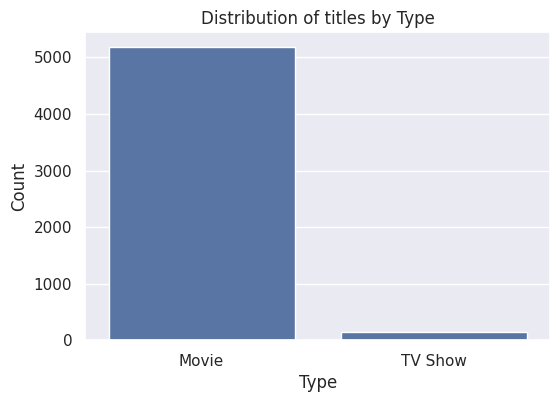

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'type', data = netflix_data_cleaned)
plt.title('Distribution of titles by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

**Observations:**
- Movies are more prevalent than TV shows on Netflix. This indicates that Netflix historically focused more on acqurining or producing Movies compared to TV shows.

- Netflix could explore increasing their series content to balance the distribution.

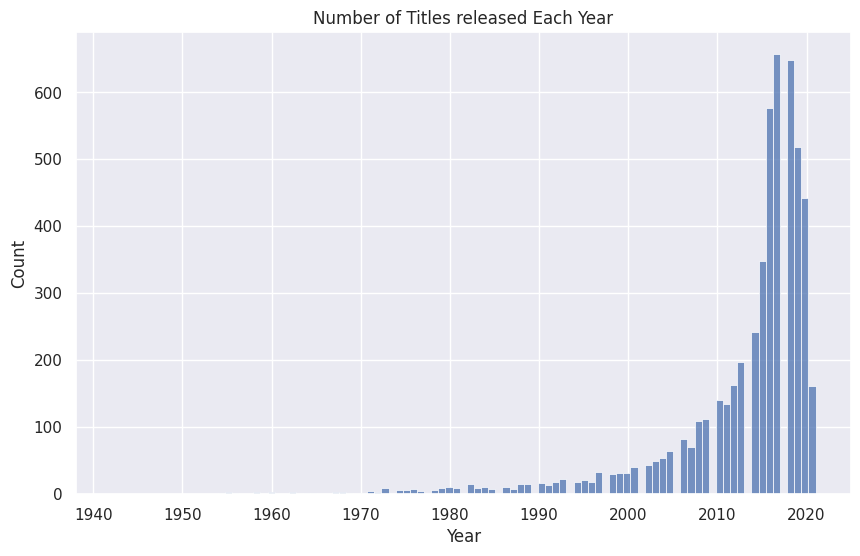

In [ ]:
# Releases by Year
plt.figure(figsize = (10,6))
sns.histplot(x = 'release_year', data = netflix_data_cleaned)
plt.title('Number of Titles released Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Observations:**
- The number of movies released per year has seen a significant increase, especially in last decade, indicating a growing trend in movie production and aquisition by Netflix.

- Netflix should continue to  invest in new content to maintain and grow its subscription base.

## Bivariate Analysis

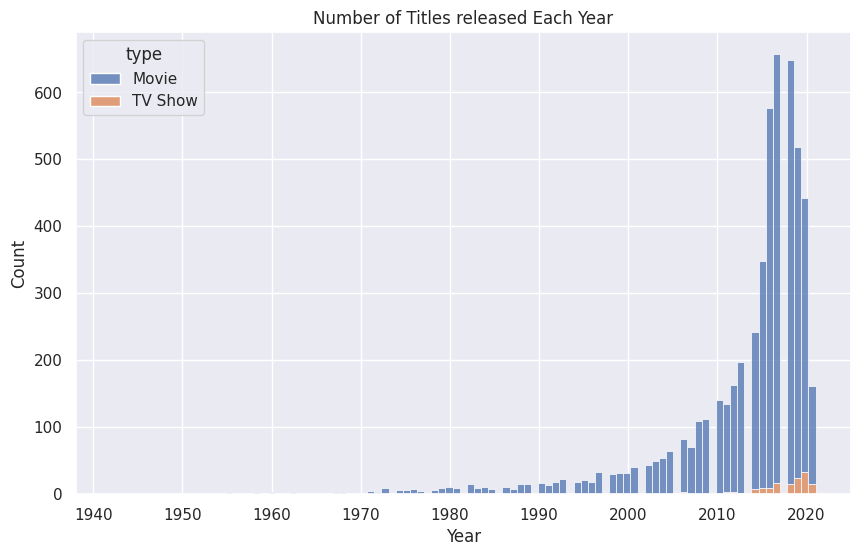

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(x = 'release_year', data = netflix_data_cleaned, hue = 'type', multiple = 'stack')
plt.title('Number of Titles released Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Observations:**
- TV shows are present but overshadowed still, that small orange slice is quietly growing. A hint that series content can spark long term loyalty.
- Fuel that momentum invest in standout mini series compelling dramas and addictive reality transform casual watchers to devoted fans.

In [ ]:
from collections import Counter

In [ ]:
def get_top_elements( Column, n= 10): #explain code
  all_elements = [ ]
  for item in netflix_data_cleaned[Column]:
    elements = item.split(' , ') #Split the string into a list
    all_elements.extend(elements)# add the list of elements to all_elements list
    elements_counts = Counter(all_elements)
    top_n = elements_counts.most_common(n)
  return top_n


In [ ]:
top_directors = get_top_elements('director',10)

In [ ]:
top_directors

[('Raúl Campos, Jan Suter', 18),
 ('Marcus Raboy', 15),
 ('Jay Karas', 14),
 ('Cathy Garcia-Molina', 13),
 ('Youssef Chahine', 12),
 ('Martin Scorsese', 12),
 ('Jay Chapman', 12),
 ('Steven Spielberg', 11),
 ('Don Michael Paul', 10),
 ('David Dhawan', 9)]

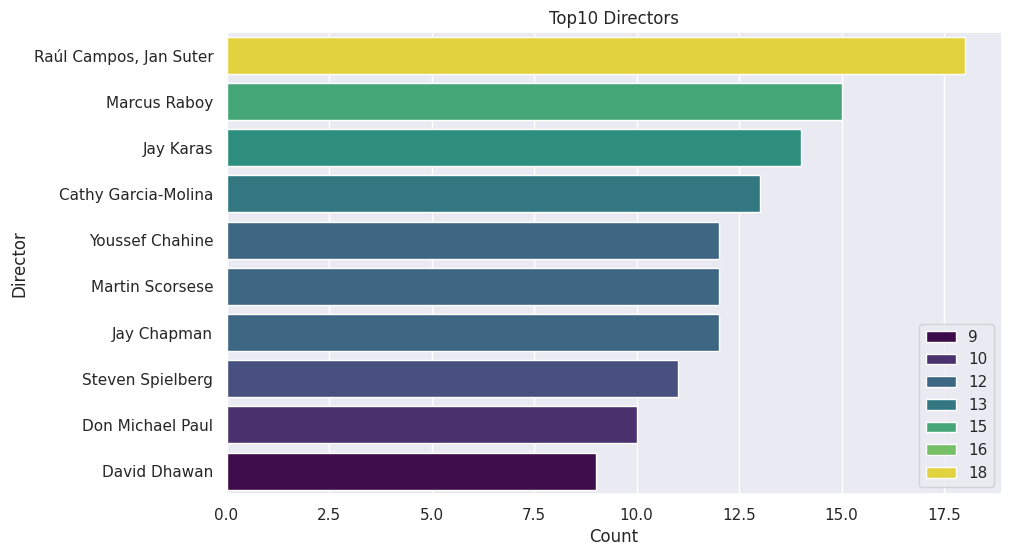

In [ ]:
directors,counts = zip(*top_directors)
plt.figure(figsize=(10,6))
sns.barplot(y= directors, x = counts, hue = counts, palette = 'viridis')
plt.title('Top10 Directors')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

Insights: Certain directors are frequently featured.

Recommendations: Netflix should continue to collaborate with Popular actors and directors to attract to their fanbase.


In [ ]:
# Genre Analysis
print("\n Top 10 Geners")
top_genres = netflix_data_cleaned["listed_in"].value_counts().head(10)
print(top_genres)



 Top 10 Geners
listed_in
Dramas, International Movies                        336
Stand-Up Comedy                                     286
Comedies, Dramas, International Movies              257
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  179
Dramas, International Movies, Romantic Movies       160
Documentaries                                       156
Comedies, International Movies                      152
Comedies, International Movies, Romantic Movies     143
Dramas                                              133
Name: count, dtype: int64


/tmp/ipython-input-4137857459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x= top_genres.values, palette = 'viridis')


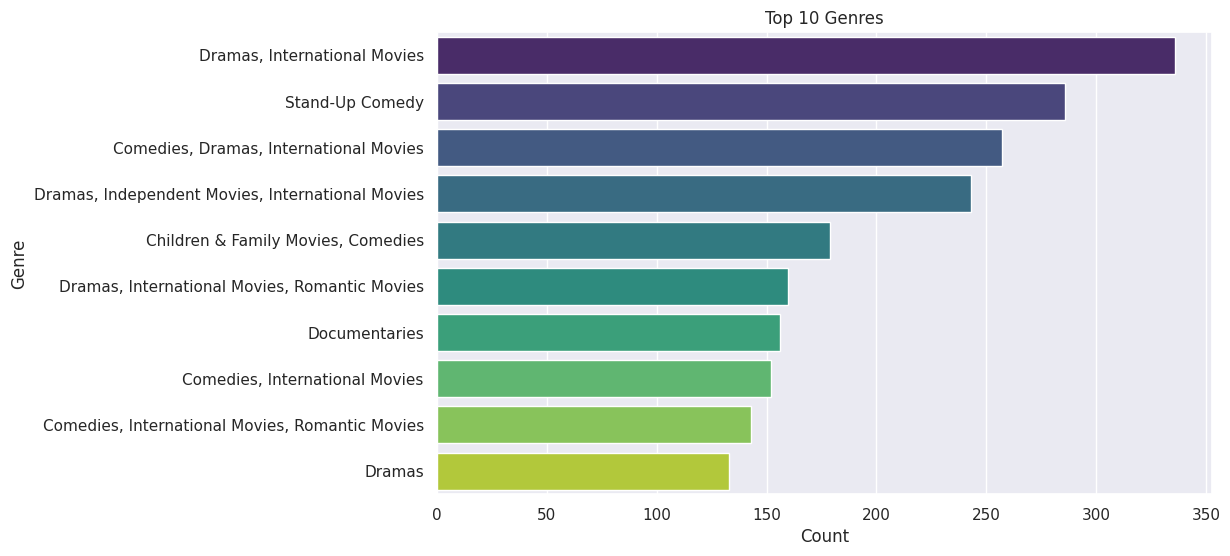

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_genres.index, x= top_genres.values, palette = 'viridis')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Observations:
- Drama, Comedy and International movies are the most popular genres.
- Netfix should invest more in these genres, as they are highly popular among viewers.

/tmp/ipython-input-3460508895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration'] = netflix_movies['duration'].str.replace('min','').astype(int)


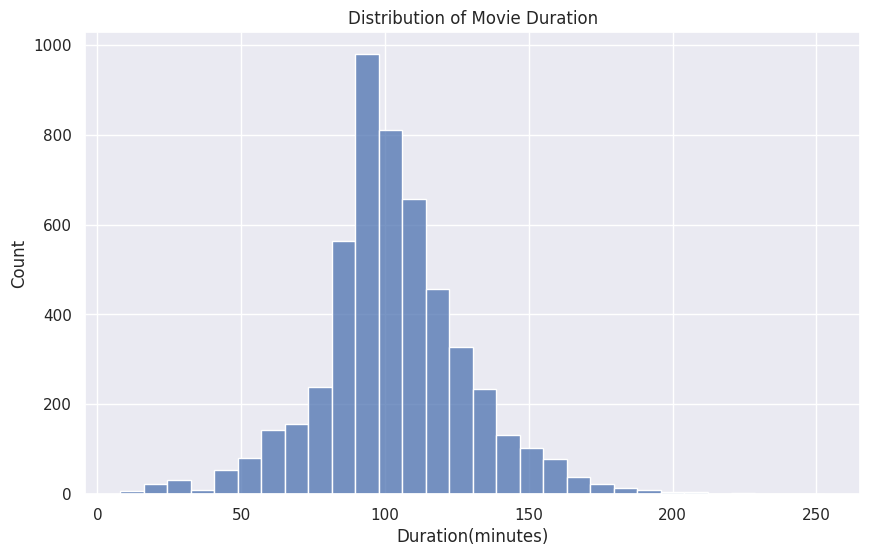

In [ ]:
netflix_movies = netflix_data_cleaned[netflix_data_cleaned['type'] == 'Movie']
netflix_movies['duration'] = netflix_movies['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(10,6))
sns.histplot(netflix_movies['duration'], bins = 30)
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration(minutes)')
plt.ylabel('Count')
plt.show()


Observations:
- Most movies have a duration between 80 and 120 minuites.
- Netflix could consider producing more short films and mini series to cater to viewers with less time.

/tmp/ipython-input-3404144312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y= top_countries_content.index,x= top_countries_content.values, palette = 'viridis')


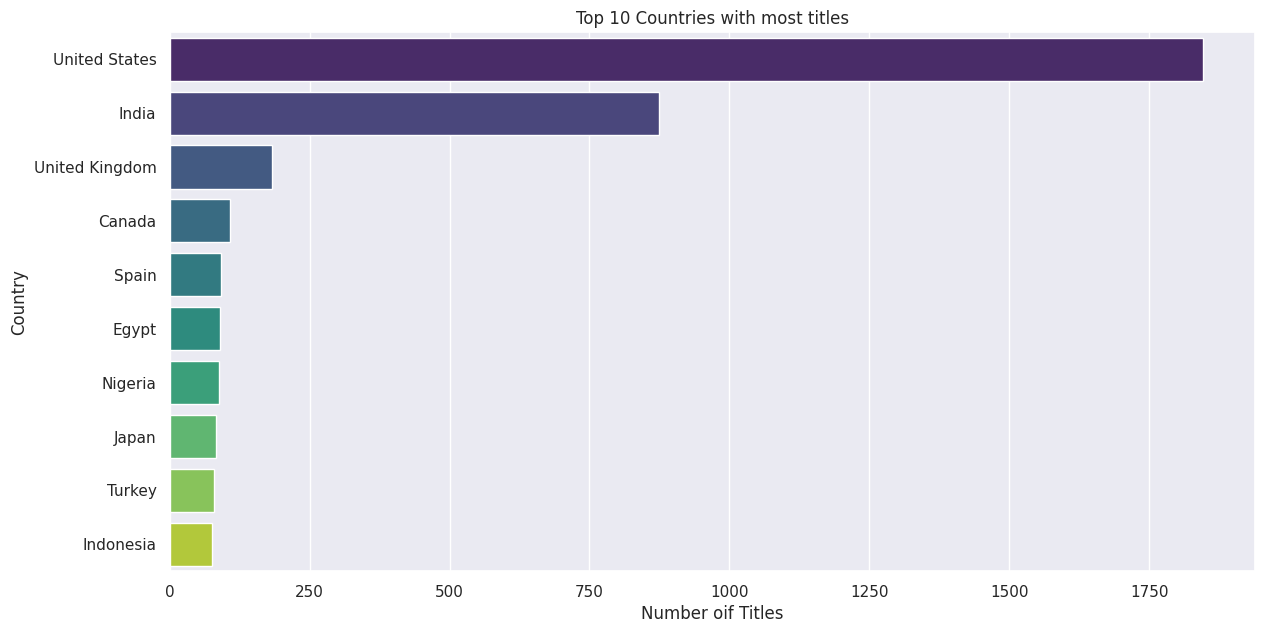

In [ ]:
top_countries_content = netflix_data_cleaned['country'].value_counts().head(10)
plt.figure(figsize = (14,7))
sns.barplot(y= top_countries_content.index,x= top_countries_content.values, palette = 'viridis')
plt.title('Top 10 Countries with most titles')
plt.xlabel('Number oif Titles')
plt.ylabel('Country')
plt.show()

Observations:
- The USA leads in terms of content avaliable on Netflix, followed by other countries. This can help in understanding the distribution of content and guide strategic decisions to expand and diversify the content library for other regions.
- Diversify the content library by acquiring more titles from other countries to cater a global audience.

#Insights and Recommendations:

**Insights**
- Movies make up the majority of Netflix content; TV shows are fewer but steadily increasing.

- Significant rise in yearly releases, especially in the last decade, shows Netflix’s aggressive content expansion.

- Drama, Comedy, and International Movies are the most frequent and popular genres.

- Most movies are between 80–120 minutes in length, fitting the standard feature film format.

- The USA is the largest contributor of content; other regions are less represented.

- A few directors have a high number of titles, indicating strong repeat collaborations.

**Recommendations**
- Increase investment in TV shows to enhance binge-watching potential and long-term subscriber retention.

- Continue producing and acquiring content in popular genres while experimenting with niche genres to reach underserved audiences.

- Introduce more short films and mini-series to cater to viewers with limited viewing time.

- Diversify content sources by acquiring more titles from underrepresented countries to appeal to a broader global audience.

- Maintain and grow partnerships with successful directors and creators to ensure a consistent stream of high-quality content.

